In [30]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from scipy.optimize import curve_fit
from scipy import signal #detrend
from scipy.optimize import curve_fit

In [31]:
#Tendencia Lineal

def flineal(x,a,b): #defino la función lineal (a:pendiente - b: ord. al origen)
    return a*x + b

def TendenciaLineal (nombreArchivo):
    #Ingreso la señal
    señal = np.loadtxt(nombreArchivo)
    N = len(señal); n = np.arange(N) 

    
    popt, pcov = curve_fit(flineal, n,señal) #realizo el ajuste

    y1 = señal - flineal(n,*popt)

    plt.figure(figsize=(20,4))
    plt.plot(n, señal,label='ECG')
    plt.plot(n,flineal(n,*popt),'k',label='fit lineal')
    plt.plot(n,y1,'r',label='ECG sin tendencia')
    plt.xlabel('n/muestras',fontsize=12)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.savefig('../imagenes/tendencia_lineal.jpg', dpi=600, bbox_inches='tight')
    plt.show()

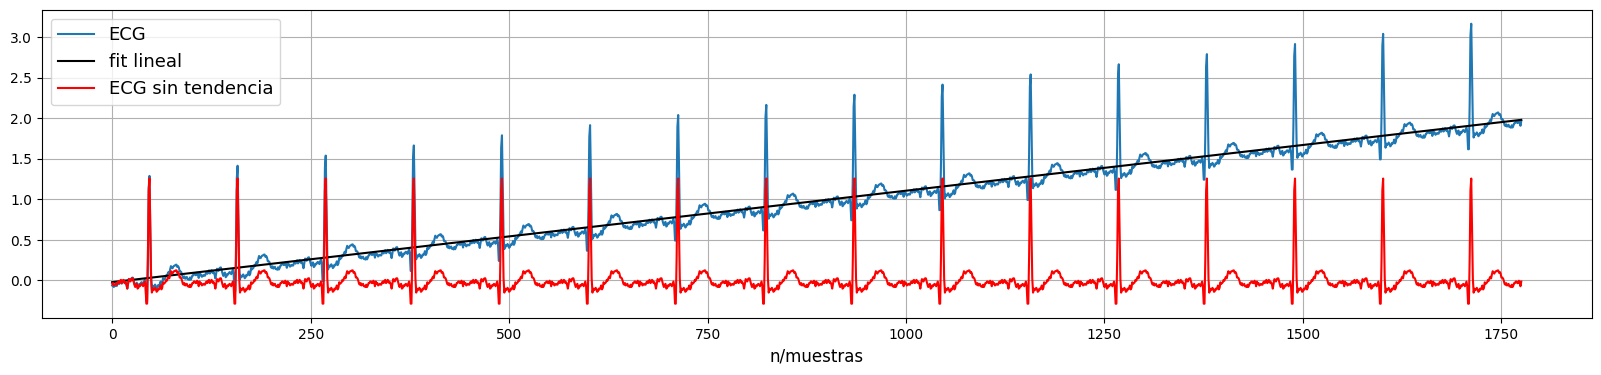

In [32]:
TendenciaLineal ('/Users/paulaaguirrecarol/Desktop/PDSB 1/ecg1.txt')

In [33]:
#Tendencia Senoidal

def fsin(x,a,f,c):
    return a*np.sin (2*np.pi*f*x) + c

def TendenciaSenoidal (nombreArchivo):
    #Ingreso la señal
    señal = np.loadtxt(nombreArchivo)
    N = len(señal); n = np.arange(N) 

    
    popt1, pcov1 = curve_fit (fsin,n,señal,p0=(0.5,1e-3,0.1)) #realizo el ajuste

    y1 = señal - fsin(n,*popt1)

    plt.figure(figsize=(20,4))
    plt.plot(n, señal,label='ECG')
    plt.plot(n,fsin(n,*popt1),'k',label='fit lineal')
    plt.plot(n,y1,'r',label='ECG sin tendencia')
    plt.xlabel('n/muestras',fontsize=12)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.savefig('../imagenes/tendencia_senoidal.jpg', dpi=600, bbox_inches='tight')
    plt.show()

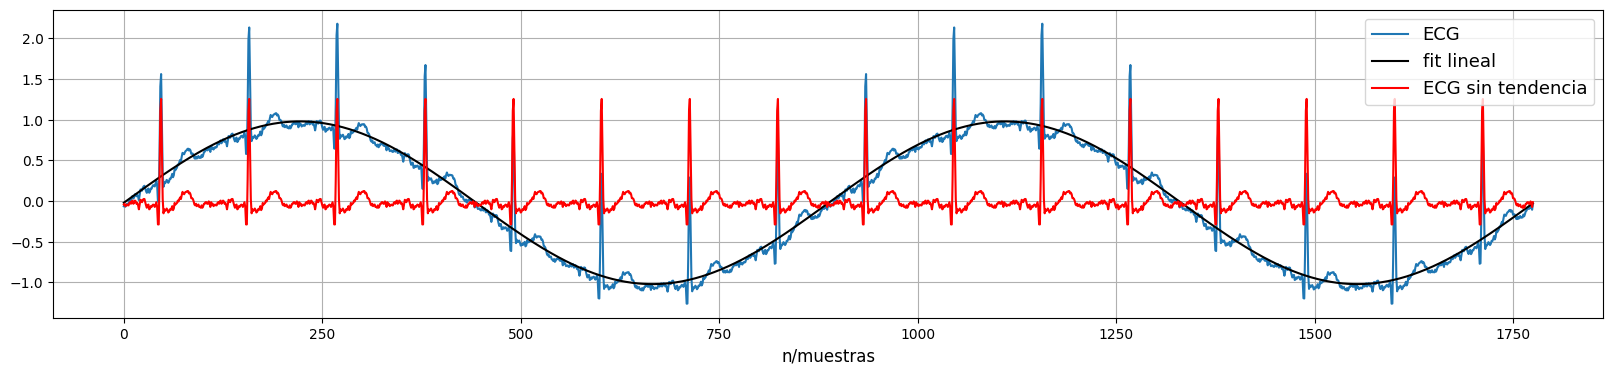

In [34]:
TendenciaSenoidal ('/Users/paulaaguirrecarol/Desktop/PDSB 1/ecg2.txt')

In [36]:
#Tendencia Senoidal con detrend

def TendenciaSenoidalDETREND (nombreArchivo):
    #Ingreso la señal
    señal = np.loadtxt(nombreArchivo)
    N = len(señal); n = np.arange(N) 

    
    A3 = np.arange(0,N,110) #arreglo
    B3 = tuple(A3) #tupla
    y33 = signal.detrend(señal,bp=A3)


    plt.figure(figsize=(20,4))
    plt.plot(n, señal,label='ECG')
    plt.plot(n,y33,'r',label='ECG sin tendencia')
    plt.xlabel('n/muestras',fontsize=12)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.savefig('../imagenes/tendencia_senoidal_detrend.jpg', dpi=600, bbox_inches='tight')
    plt.show()

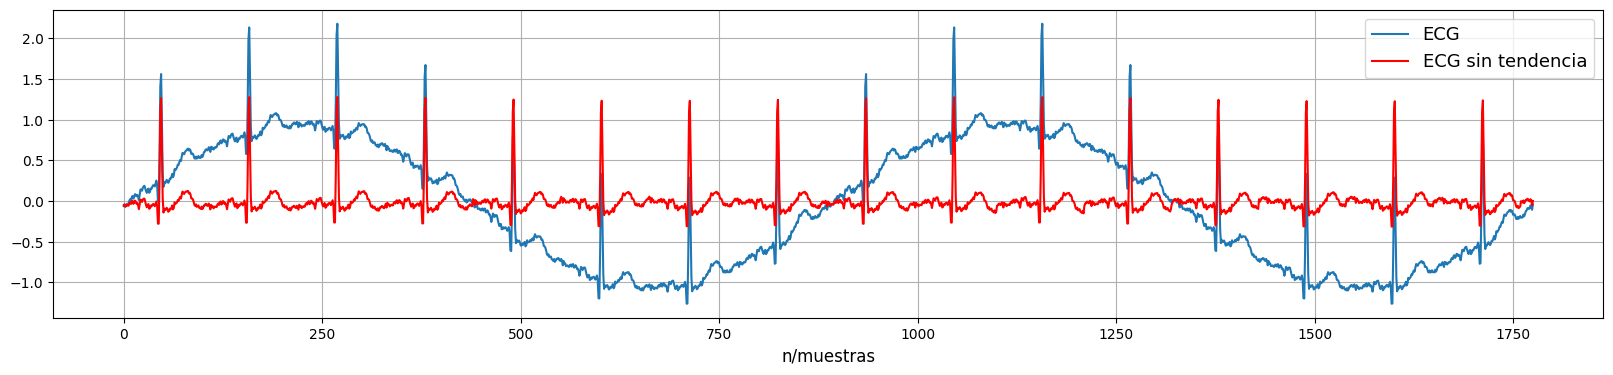

In [37]:
TendenciaSenoidalDETREND ('/Users/paulaaguirrecarol/Desktop/PDSB 1/ecg2.txt')

In [38]:
#Tendencia Exponencial

def fexp (x,a,b,c):
    return a*np.exp(-b*x)+c

def TendenciaExponencial (nombreArchivo):
    #Ingreso la señal
    señal = np.loadtxt(nombreArchivo)
    N = len(señal); n = np.arange(N) 

    
    popt2 , pcov2 = curve_fit (fexp,n,señal,p0=(1,1e-3,0.1)) #realizo el ajuste

    y1 = señal - fexp(n,*popt2)

    plt.figure(figsize=(20,4))
    plt.plot(n, señal,label='ECG')
    plt.plot(n,fexp(n,*popt2),'k',label='fit lineal')
    plt.plot(n,y1,'r',label='ECG sin tendencia')
    plt.xlabel('n/muestras',fontsize=12)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.savefig('../imagenes/tendencia_exponencial.jpg', dpi=600, bbox_inches='tight')
    plt.show()

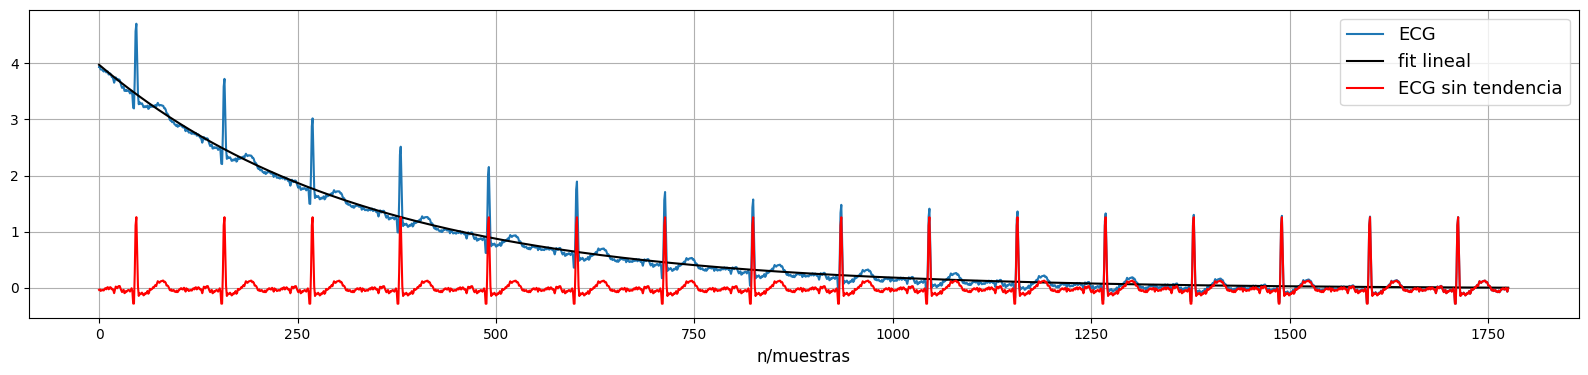

In [39]:
TendenciaExponencial ('/Users/paulaaguirrecarol/Desktop/PDSB 1/ecg4.txt')

In [40]:
#Tendencia Exponencial con suavizado con filtro Savitzky-Golay


def TendenciaExponencialFSG (nombreArchivo):
    #Ingreso la señal
    señal = np.loadtxt(nombreArchivo)
    N = len(señal); n = np.arange(N) 

    
    y_4 = signal.savgol_filter (señal,1080,3) #window size 181, polynomial orden 3 
    y_44 = señal - y_4

    plt.figure(figsize=(20,4))
    plt.plot(n, señal,label='ECG')
    plt.plot(n,y_4,'k',label='y_using_savgol_fit')
    plt.plot(n,y_44,'r',label='ECG sin tendencia')
    plt.xlabel('n/muestras',fontsize=12)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.savefig('../imagenes/tendencia_exponencial_fsg.jpg', dpi=600, bbox_inches='tight')
    plt.show()

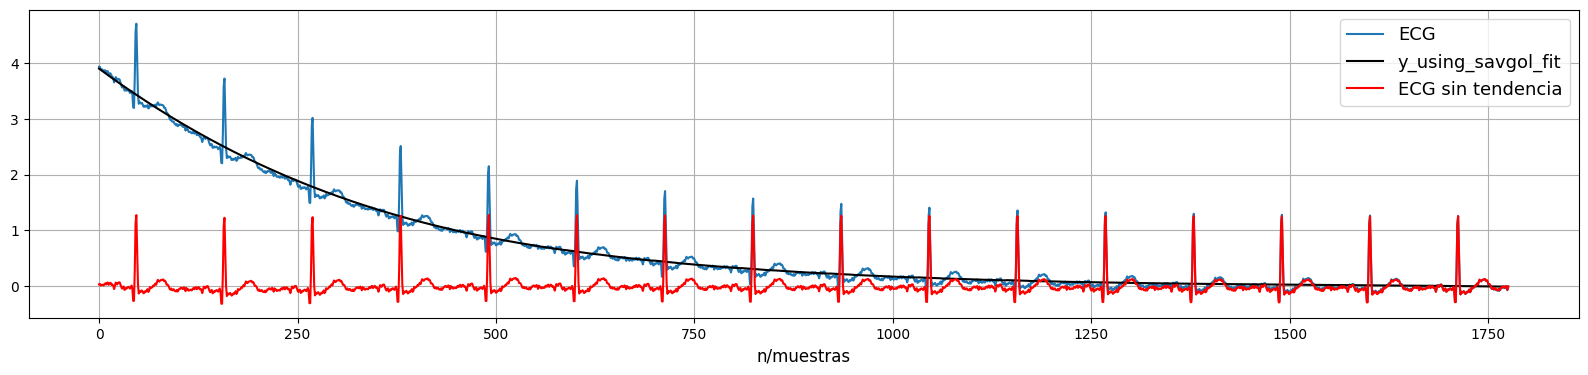

In [41]:
TendenciaExponencialFSG ('/Users/paulaaguirrecarol/Desktop/PDSB 1/ecg4.txt')
